In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
road = cv2.imread('../DATA/road_image.jpg')
road_copy = road.copy()

In [3]:
road.shape

(600, 800, 3)

In [4]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)

print(marker_image.shape)
print(segments.shape)

(600, 800)
(600, 800, 3)


In [5]:
from matplotlib import cm

In [6]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [7]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255) # RGB colors successively

colors = list()
for i in range(10):
    colors.append(create_rgb(i))

colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [8]:
num_markers = 9
current_marker = 1
marks_updated = False

def mouse_callback(event, x, y, flags, param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        marks_updated = True

In [10]:
cv2.namedWindow("Road Image")
cv2.setMouseCallback("Road Image", mouse_callback)

while True:
    
    cv2.imshow("Road Image", road_copy)
    cv2.imshow("Segments", segments)
    
    k = cv2.waitKey(1) & 0xFF
    
    if k == 27:
        break
        
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
        
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        segments = np.zeros(road.shape,dtype=np.uint8)

        for color_ind in range(num_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
            
        marks_updated = False
    
cv2.destroyAllWindows()

In [19]:
def display(img,cmap=None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(36,30))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

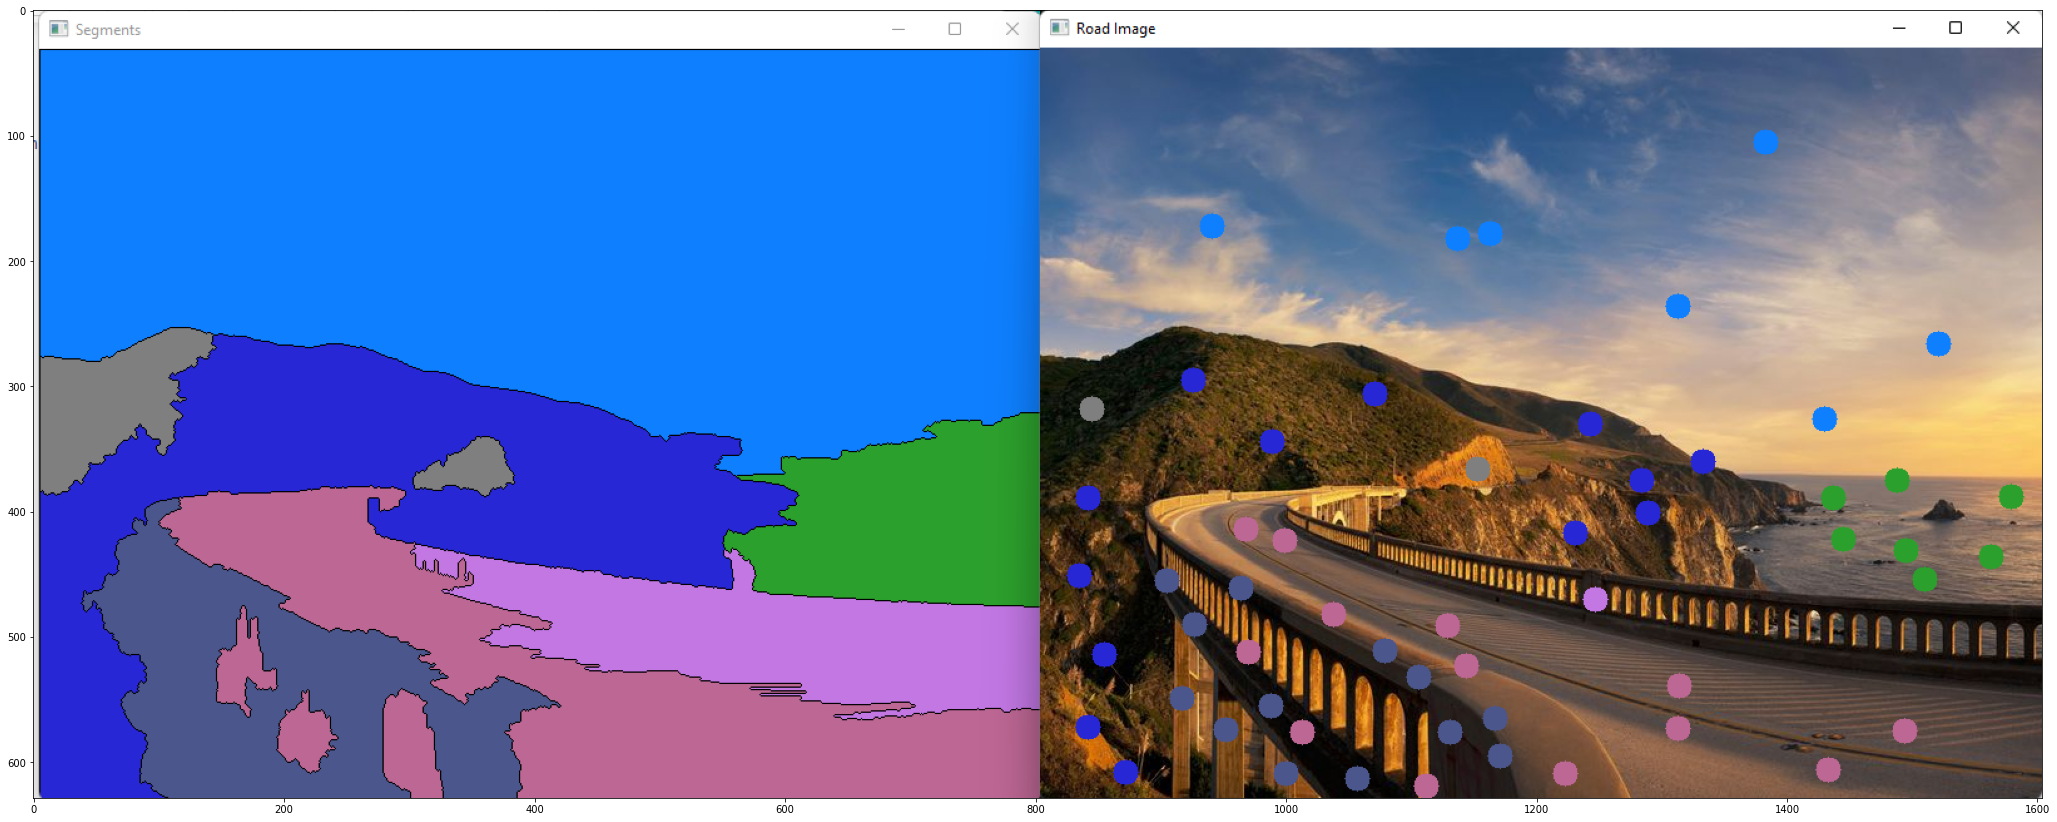

In [20]:
display(cv2.imread('../DATA/seeds_output.png'))